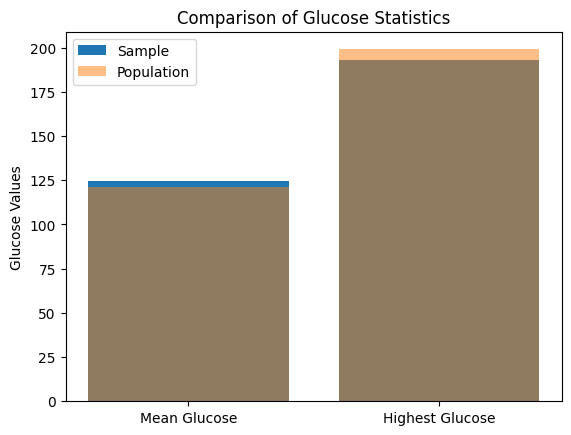

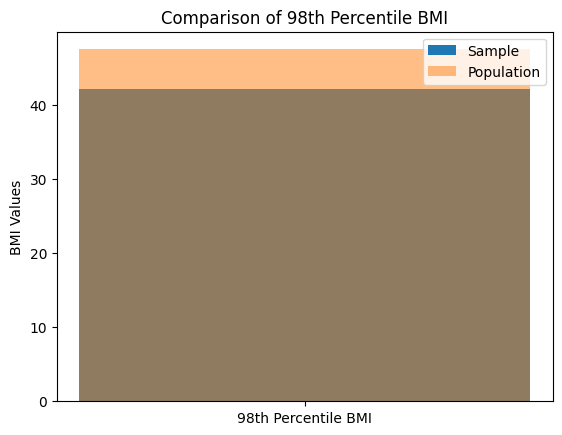

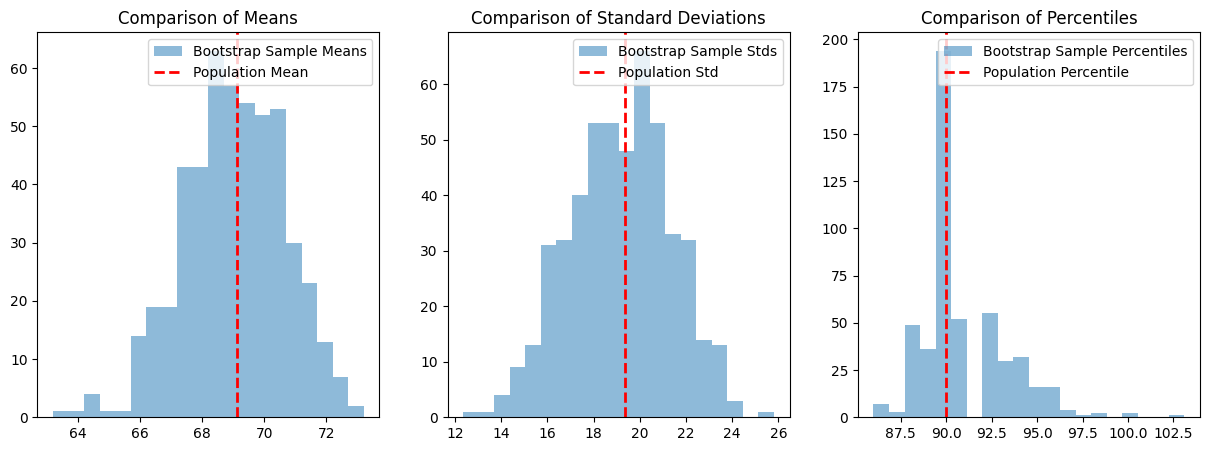

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/diabetes (1).csv')

np.random.seed(48)

sample = data.sample(n=25)

sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()

population_mean_glucose = data['Glucose'].mean()
population_highest_glucose = data['Glucose'].max()

variables = ['Mean Glucose', 'Highest Glucose']
values_sample = [sample_mean_glucose, sample_highest_glucose]
values_population = [population_mean_glucose, population_highest_glucose]

plt.bar(variables, values_sample, label='Sample')
plt.bar(variables, values_population, alpha=0.5, label='Population')

plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.legend()
plt.show()

percentile_98_sample = np.percentile(sample['BMI'], 98)
percentile_98_population = np.percentile(data['BMI'], 98)

variables = ['98th Percentile BMI']
values_sample = [percentile_98_sample]
values_population = [percentile_98_population]

plt.bar(variables, values_sample, label='Sample')
plt.bar(variables, values_population, alpha=0.5, label='Population')

plt.title('Comparison of 98th Percentile BMI')
plt.ylabel('BMI Values')
plt.legend()
plt.show()

n_bootstrap_samples = 500
bootstrap_sample_size = 150

bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for _ in range(n_bootstrap_samples):
    bootstrap_sample = data['BloodPressure'].sample(n=bootstrap_sample_size, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())
    bootstrap_stds.append(bootstrap_sample.std())
    bootstrap_percentiles.append(np.percentile(bootstrap_sample, 95))  # Adjust percentile as needed

population_mean_bp = data['BloodPressure'].mean()
population_std_bp = data['BloodPressure'].std()
population_percentile_95_bp = np.percentile(data['BloodPressure'], 95)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(bootstrap_means, bins=20, alpha=0.5, label='Bootstrap Sample Means')
plt.axvline(population_mean_bp, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.title('Comparison of Means')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(bootstrap_stds, bins=20, alpha=0.5, label='Bootstrap Sample Stds')
plt.axvline(population_std_bp, color='red', linestyle='dashed', linewidth=2, label='Population Std')
plt.title('Comparison of Standard Deviations')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(bootstrap_percentiles, bins=20, alpha=0.5, label='Bootstrap Sample Percentiles')
plt.axvline(population_percentile_95_bp, color='red', linestyle='dashed', linewidth=2, label='Population Percentile')
plt.title('Comparison of Percentiles')
plt.legend()

plt.show()
